## Heart Failure

Dataset: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Features: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

Artigo: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


### Features [1]:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean) - **{0: False, 1: True}**
- high blood pressure: if the patient has hypertension (boolean) - **{0: False, 1: True}**
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) - **entre 6000 - 13000**
- diabetes: if the patient has diabetes (boolean) - **{0: False, 1: True}**
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary) - **{0: "Woman", 1: "Man"}**
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean) - **{0: False, 1: True}**
- time: follow-up period (days) - **Período de acompanhamento**
- [target] death event: if the patient deceased during the follow-up period (boolean) - **{0: False, 1: True}**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

---

## Base de dados

In [2]:
# Raw data
heart = pd.read_csv("heart_failure_dataset.csv")
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


----

## Descrever os dados

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Separação de variáveis

In [5]:
# Target
output = "DEATH_EVENT"

# Variáveis não relacionadas à saúde do indivíduo
sex = "sex"
age = "age"

# variáveis categóricas - relacionadas com a saúde do indivíduo
var_categ = ['smoking','diabetes','anaemia','high_blood_pressure']

# variáveis numéricas - relacionadas com a saúde do indivíduo
var_cont = ["creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]

# É preciso analisar esta variável de uma maneira específica - Tempo de acompanhamento do médico
time = "time"

---

### Análise multivariada: Cuidado com correlação com booleanos

plt.figure(figsize=(12,12))
sns.heatmap(heart.corr(), annot = True, square = True, cmap="coolwarm");

----

## Renomear features categóricas

In [7]:
heart["anaemia"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["diabetes"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["high_blood_pressure"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["smoking"].replace({0: "No", 1: "Yes"}, inplace = True)
heart["sex"].replace({0: "Woman", 1: "Man"}, inplace = True)
heart["DEATH_EVENT"].replace({0: "Survived", 1: "Dead"}, inplace = True)

In [8]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,No,582,No,20,Yes,265000.00,1.9,130,Man,No,4,Dead
1,55.0,No,7861,No,38,No,263358.03,1.1,136,Man,No,6,Dead
2,65.0,No,146,No,20,No,162000.00,1.3,129,Man,Yes,7,Dead
3,50.0,Yes,111,No,20,No,210000.00,1.9,137,Man,No,7,Dead
4,65.0,Yes,160,Yes,20,No,327000.00,2.7,116,Woman,No,8,Dead


---

## Análise do target (DEATH_EVENT)

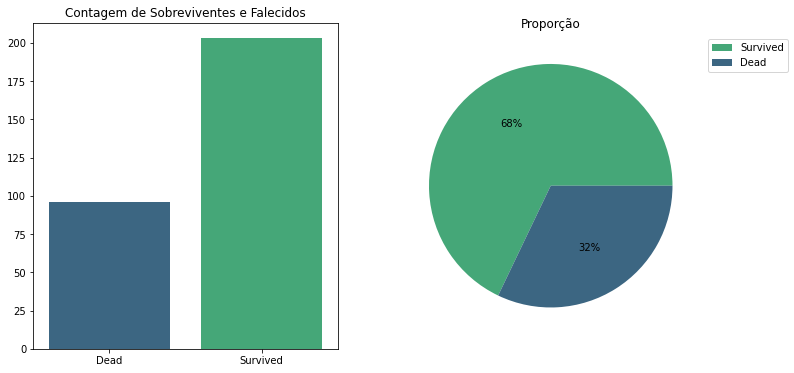

In [41]:
# Survived or Dead
fig, axs = plt.subplots(1,2, figsize = (12,6))

# Valores totais
total_mortes = heart['DEATH_EVENT'].value_counts().sort_values()
axs[0] = sns.barplot(x=total_mortes.index, y=total_mortes.values, palette='viridis', ax = axs[0])
axs[0].set_title('Contagem de Sobreviventes e Falecidos')

# Proporção
proporcao = heart['DEATH_EVENT'].value_counts(normalize = True)
plt.pie(proporcao, autopct = "%1.0f%%", colors = ["#45A778","#3C6682"])
plt.legend(labels = ["Survived","Dead"], loc = 2, bbox_to_anchor = (1,1))
plt.title('Proporção');

Proporção de sobreviventes e falecidos em torno de **2:1**

---

# Variáveis categóricas

## sex

In [12]:
sex = heart.groupby(["sex", "DEATH_EVENT"])[["sex"]].count()
sex['proporcao'] = heart.groupby(["sex", "DEATH_EVENT"])[["sex"]].count()/heart.groupby(["sex"])[["sex"]].count()
sex.rename({'sex':'total'}, axis=1, inplace=True)
sex.reset_index(inplace=True)
sex

,sex,DEATH_EVENT,total,proporcao
0,Man,Dead,62,0.319588
1,Man,Survived,132,0.680412
2,Woman,Dead,34,0.323810
3,Woman,Survived,71,0.676190


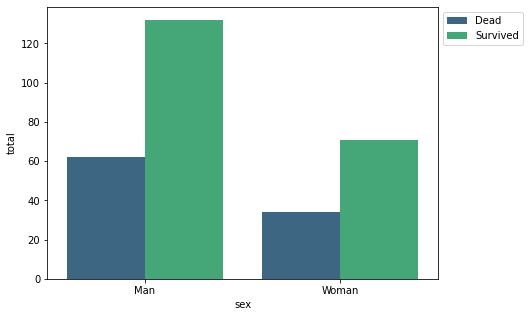

In [38]:
plt.figure(figsize = (7,5))
ax = sns.barplot(data=sex, x='sex', y='total', hue='DEATH_EVENT', palette='viridis')
plt.legend(loc = 2, bbox_to_anchor = (1,1));

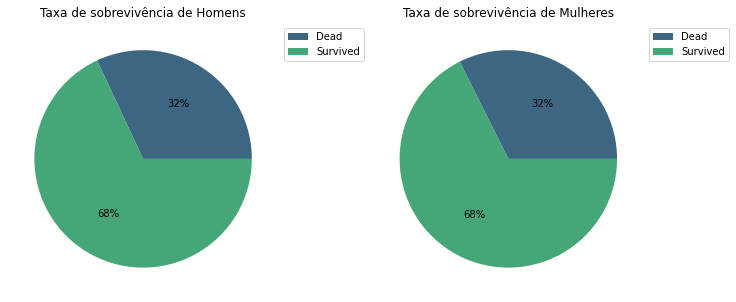

In [39]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)

proporcao = heart[heart["sex"]=="Man"].groupby('DEATH_EVENT')["age"].count()
ax1.pie(proporcao, autopct = "%1.0f%%", colors = ["#3C6682", "#45A778"])
plt.title('Taxa de sobrevivência de Homens')
plt.legend(labels = ["Dead","Survived"], loc = 2, bbox_to_anchor = (1,1))


ax2 = fig.add_subplot(122)
proporcao = heart[heart["sex"]=="Woman"].groupby('DEATH_EVENT')["age"].count()
ax2.pie(proporcao, autopct = "%1.0f%%", colors = ["#3C6682", "#45A778"])
plt.title('Taxa de sobrevivência de Mulheres')
plt.legend(labels = ["Dead","Survived"], loc = 2, bbox_to_anchor = (1,1));

---

## smoking

In [16]:
smoking = heart.groupby(["smoking", "DEATH_EVENT"])[["smoking"]].count()
smoking['proporcao'] = heart.groupby(["smoking", "DEATH_EVENT"])[["smoking"]].count()/heart.groupby(["smoking"])[["smoking"]].count()
smoking.rename({'smoking':'total'}, axis=1, inplace=True)
smoking

total  proporcao
smoking DEATH_EVENT                  
No      Dead            66   0.325123
        Survived       137   0.674877
Yes     Dead            30   0.312500
        Survived        66   0.687500

---

## diabetes

In [17]:
diabetes = heart.groupby(["diabetes", "DEATH_EVENT"])[["diabetes"]].count()
diabetes['proporcao'] = heart.groupby(["diabetes", "DEATH_EVENT"])[["diabetes"]].count()/heart.groupby(["diabetes"])[["diabetes"]].count()
diabetes.rename({'diabetes':'total'}, axis=1, inplace=True)
diabetes

total  proporcao
diabetes DEATH_EVENT                  
No       Dead            56   0.321839
         Survived       118   0.678161
Yes      Dead            40   0.320000
         Survived        85   0.680000

---

## anaemia

In [18]:
anaemia = heart.groupby(["anaemia", "DEATH_EVENT"])[["anaemia"]].count()
anaemia['proporcao'] = heart.groupby(["anaemia", "DEATH_EVENT"])[["anaemia"]].count()/heart.groupby(["anaemia"])[["anaemia"]].count()
anaemia.rename({'anaemia':'total'}, axis=1, inplace=True)
anaemia

total  proporcao
anaemia DEATH_EVENT                  
No      Dead            50   0.294118
        Survived       120   0.705882
Yes     Dead            46   0.356589
        Survived        83   0.643411

---

## high_blood_pressure

In [19]:
high_pressure = heart.groupby(["high_blood_pressure", "DEATH_EVENT"])[["high_blood_pressure"]].count()
high_pressure['proporcao'] = heart.groupby(["high_blood_pressure", "DEATH_EVENT"])[["high_blood_pressure"]].count()/heart.groupby(["high_blood_pressure"])[["high_blood_pressure"]].count()
high_pressure.rename({'high_blood_pressure':'total'}, axis=1, inplace=True)
high_pressure.reset_index(inplace=True)
high_pressure

,high_blood_pressure,DEATH_EVENT,total,proporcao
0,No,Dead,57,0.293814
1,No,Survived,137,0.706186
2,Yes,Dead,39,0.371429
3,Yes,Survived,66,0.628571


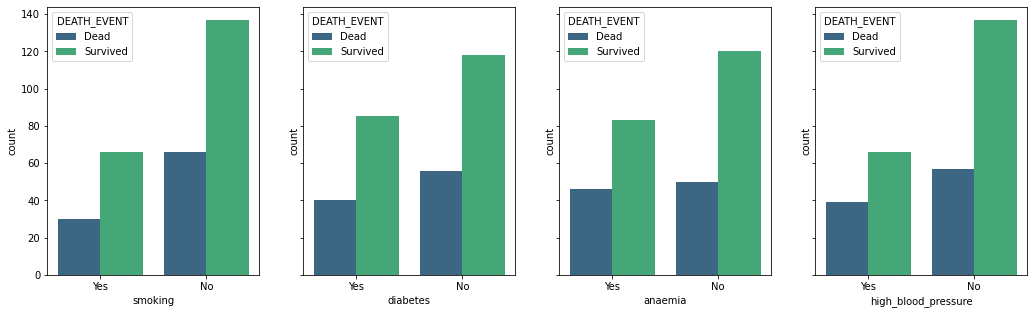

In [44]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5), sharey=True, sharex=True)
cont = 0
for i in range(4):
    sns.countplot(data=heart, x=var_categ[cont], ax=ax[i], hue='DEATH_EVENT', palette='viridis', order=["Yes","No"])
    cont = cont + 1
            
fig.tight_layout(pad=3.0)

#### A proporção de sobreviventes e falecidos para pessoas com anemia e/ou pressão alta são levemente diferentes da média geral. Para as pessoas que não tem anemia e nem pressão alta, a taxa de sobrevivência é maior.

---

# Variáveis contínuas

## Verificação de outliers nas variáveis contínuas

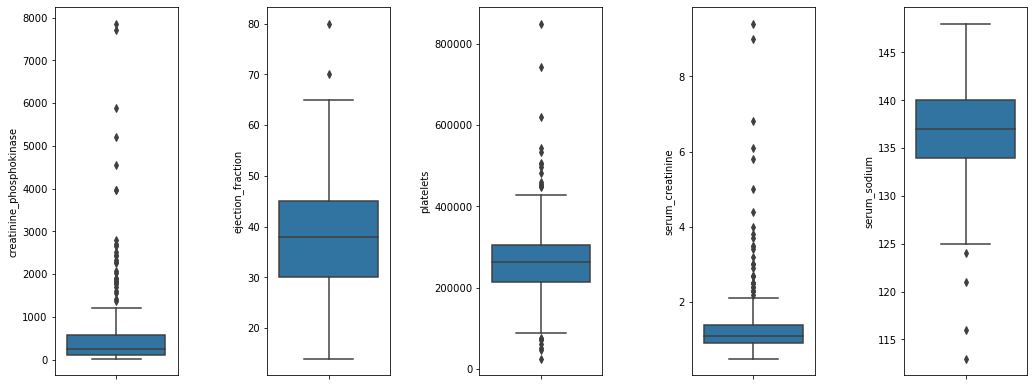

In [18]:
fig, ax = plt.subplots(1,5, figsize=(15,6))
col = 0
for i in range(5):
    sns.boxplot(data = heart, y = var_cont[col], ax = ax[i]);
    col += 1
        
fig.tight_layout(pad = 3)

---

### Teste de hipótese

- $H_{0}$ : A média de **-feature-** para falecidos é igual a média para sobreviventes
- $H_{1}$ : A média de **-feature-** para falecidos é diferente da média para sobreviventes

**Paired Sample Z-Test**

$$z = \frac{x_{0,mean} - x_{1,mean}}{\sqrt{\frac{\sigma^2_{0}}{n_{0}}+\frac{\sigma^2_{1}}{n_{1}}}}$$

Sobreviventes
- $x_{0,mean}$
- $\sigma^2_{0}$
- $n_{0}$

Falecidos
- $x_{1,mean}$
- $\sigma^2_{1}$
- $n_{1}$
-------
- $\alpha$ = 0.05
- gl = $n_{0}$ + $n_{1}$ - 2 = 203 + 96 - 2 = 297
- two-tailed
- $Z_{c}$ = 1.96
---
Se z > $Z_{c}$, então rejeita a hipótese nula

---

---

## age

In [19]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['age'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['age'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['age'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['age'].std())

Pessoas falecidas
65.0
13.214555639583372

Pessoas vivas
60.0
10.637890226515534


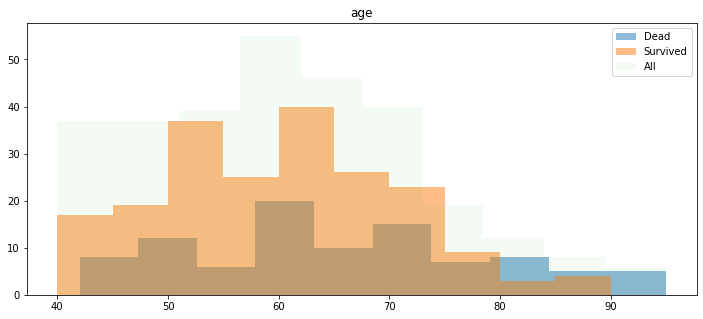

In [38]:
plt.figure(figsize=(12,5))
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["age"],  alpha = 0.5, bins = 10, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["age"], alpha = 0.5, bins = 10, label = 'Survived')
plt.hist(heart["age"], alpha = 0.05, bins = 10, label = 'All')
plt.legend()
plt.title("age");

### Teste-Z

In [21]:
# Sobreviventes
x0 = 60
s2_0 = 10.64**2
n0 = 203

# Falecidas
x1 = 65
s2_1 = 13.21**2
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 3.244132161308385
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


----

## creatinine_phosphokinase

In [22]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['creatinine_phosphokinase'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['creatinine_phosphokinase'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['creatinine_phosphokinase'].std())

Pessoas falecidas
259.0
1316.5806399417013

Pessoas vivas
245.0
753.7995715566005


### Teste Z

In [23]:
# Sobreviventes
x0 = 245
s2_0 = 568212.9
n0 = 203

# Falecidas
x1 = 259
s2_1 = 1733435.6
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 0.09694282223354052
Falhou-se em rejeitar a hipótese nula


---

## ejection_fraction

In [24]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['ejection_fraction'].median())
print(heart[heart["DEATH_EVENT"] == 'Dead']['ejection_fraction'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].median())
print(heart[heart["DEATH_EVENT"] == 'Survived']['ejection_fraction'].std())

Pessoas falecidas
30.0
12.52530333701386

Pessoas vivas
38.0
10.859962681586294


## Teste Z

In [25]:
# Sobreviventes
x0 = 38
s2_0 = 117.94
n0 = 203

# Falecidas
x1 = 30
s2_1 = 156.75
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 5.376764548697805
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


---

## serum_creatinine

In [26]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_creatinine'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_creatinine'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_creatinine'].std())

Pessoas falecidas
1.8358333333333332
1.4685615351275343

Pessoas vivas
1.184876847290641
0.6540826541207885


## Teste Z

In [27]:
# Sobreviventes
x0 = 1.185
s2_0 = 0.428
n0 = 203

# Falecidas
x1 = 1.836
s2_1 = 2.16
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 4.1499181001815435
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


----

## platelets

In [28]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['platelets'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['platelets'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['platelets'].std())

Pessoas falecidas
256381.0447916667
98525.68285648678

Pessoas vivas
266657.4899014779
97531.20228346101


In [29]:
# Sobreviventes
x0 = 266657.49
s2_0 = 97531.20**2
n0 = 203

# Falecidas
x1 = 256381.04
s2_1 = 98525.68**2
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 0.8447857686207411
Falhou-se em rejeitar a hipótese nula


---

## serum_sodium

In [30]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_sodium'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['serum_sodium'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['serum_sodium'].std())

Pessoas falecidas
135.375
5.00157869813964

Pessoas vivas
137.2167487684729
3.9829233593022115


## Teste Z

In [31]:
# Sobreviventes
x0 = 137.22
s2_0 = 15.86
n0 = 203

# Falecidas
x1 = 135.375
s2_1 = 25
n1 = 96

z = (x0 - x1)/(np.sqrt((s2_0/n0)+(s2_1/n1)))
print(f"z = {abs(z)}")

if abs(z) > 1.96:
    print("Rejeita-se a hipótese nula e aceita-se a hipótese alternativa")
else:
    print("Falhou-se em rejeitar a hipótese nula")

z = 3.170942243443875
Rejeita-se a hipótese nula e aceita-se a hipótese alternativa


---

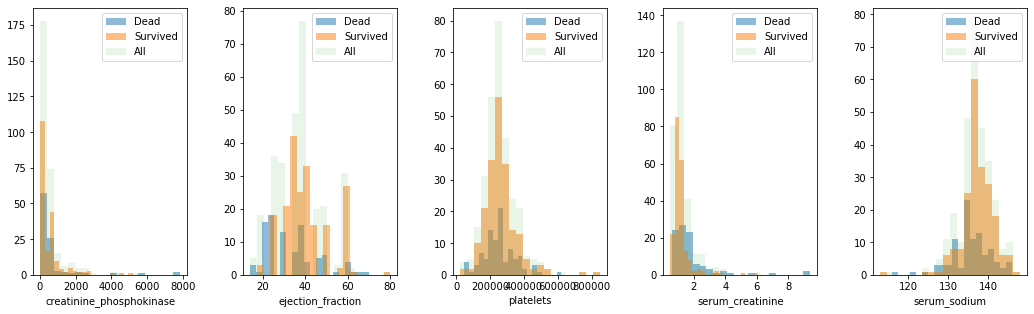

In [42]:
fig, ax = plt.subplots(1,5, figsize=(15,5))     

for i in range(5):
    ax[i].hist(heart[heart["DEATH_EVENT"] == "Dead"][var_cont[i]],  alpha = 0.5, bins = 20, label = 'Dead')
    ax[i].hist(heart[heart["DEATH_EVENT"] == "Survived"][var_cont[i]], alpha = 0.5, bins = 20, label = 'Survived')
    ax[i].hist(heart[var_cont[i]], alpha = 0.1, bins = 20, label = 'All')
    ax[i].legend(loc = "upper right")
    ax[i].set_xlabel(var_cont[i]);

fig.tight_layout(pad = 3)

---

## time

In [33]:
print("Pessoas falecidas")
print(heart[heart["DEATH_EVENT"] == 'Dead']['time'].mean())
print(heart[heart["DEATH_EVENT"] == 'Dead']['time'].std())
print()
print("Pessoas vivas")
print(heart[heart["DEATH_EVENT"] == 'Survived']['time'].mean())
print(heart[heart["DEATH_EVENT"] == 'Survived']['time'].std())

Pessoas falecidas
70.88541666666667
62.378280597904244

Pessoas vivas
158.3399014778325
67.7428724392971


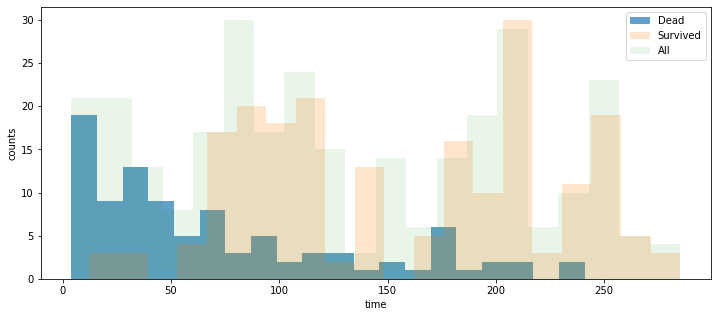

In [34]:
plt.figure(figsize=(12,5))
plt.hist(heart[heart["DEATH_EVENT"] == "Dead"]["time"],  alpha = 0.7, bins = 20, label = 'Dead')
plt.hist(heart[heart["DEATH_EVENT"] == "Survived"]["time"], alpha = 0.2, bins = 20, label = 'Survived')
plt.hist(heart["time"], alpha = 0.1, bins = 20, label = 'All')
plt.xlabel("time")
plt.ylabel("counts")
plt.legend()
plt.show()

----

---

# Conclusão

- Fazendo uma EDA, teste de hipóteses e usando gráficos, **anaemia**, **high_blood_pressure**, **serum_creatinine**, **ejection_fraction** e **serum_sodium** apresentaram a possibilidade de poderem prever uma possível falha no coração.
- De acordo com o artigo [1], **serum_creatinine** e **ejection_fraction** são os dois parâmetros utilizados para identificar uma possível falha no coração. Nesse caso, foi utilizado Machine Learning para identificar com maior precisão estes dois parâmetros.

# Referência
[1] Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5